# Reminder: concetti di statistica

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from mymodule import *

In [3]:
def func(x, a, b):
    return a+b*x

## Pseudo esperimenti

Possiamo simulare i risultati di un esperimento a partire da un modello.

Ad esempio supponiamo che esista una relazione lineare tra x e y del tipo y = A + B*x

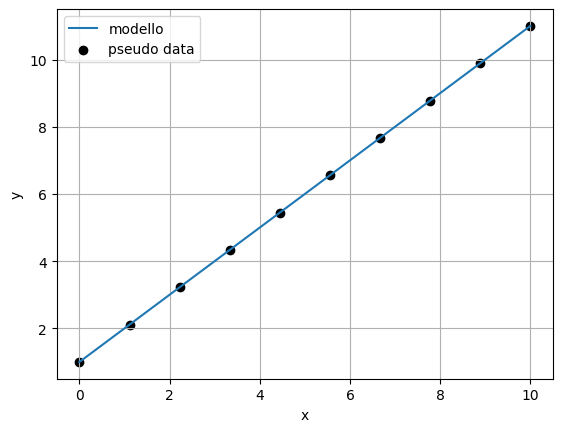

In [104]:
npoints = 10

x = np.linspace(0, 10, npoints)
A = 1
B = 1
y = func(x, A, B)

plt.plot(x, func(x, A, B) , label='modello')
plt.scatter(x, y, color='black', label='pseudo data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

Possiamo includere nel modello anche un'icertezza sulla misura e utilizzare la funzione random.normal per estrarre eventi casuali

a = 0.8272882123679762+/-0.29387690682262935
b = 0.9893645830520833+/-0.049543369430686234
cov(a,b) = -0.012272727272727275
chi/ndof= 12.848853926556739/8 = 1.6061067408195924


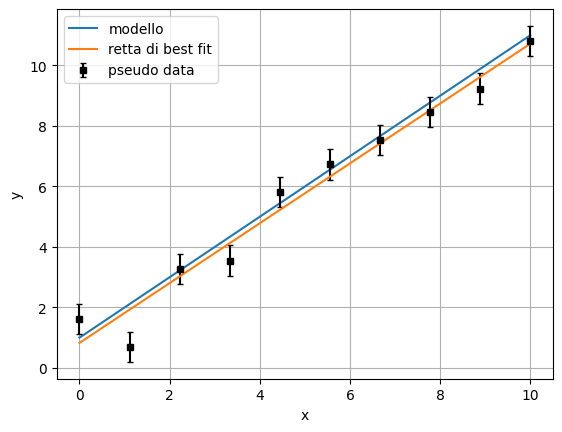

In [105]:
sigma = 0.5
W = np.ones_like(x)/sigma**2
noise = sigma*np.random.normal(0,1,npoints) #errore gaussiano. 
y = func(x, A, B) + noise
a_f, b_f, sigma_a_f, sigma_b_f, cov_ab_f, chi2_f = fit_lineare_pesato(x, y, W)

plt.plot(x, func(x, A, B) , label='modello')
plt.errorbar(x, y, yerr = sigma, fmt='s', markersize=4., capsize=2, color='black', label='pseudo data')
plt.plot(x, func(x, a_f, b_f) , label = 'retta di best fit')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

La cosa interessante è che possiamo ripetere questa estrazione un numero esorbitante di volte

In [106]:
CHI2 = []
AF = []
BF = []
SAF = []
SBF = []
COV = []

nsim = 10000
for i in range(nsim):
    sigma = 0.5
    W = np.ones_like(x)/sigma**2
    noise = sigma*np.random.normal(0,1,npoints)
    y = func(x, A, B) + noise
    a_f, b_f, sigma_a_f, sigma_b_f, cov_ab_f, chi2_f = fit_lineare_pesato(x, y, W, verbose=False)

    CHI2 += [chi2_f]
    AF += [a_f]
    BF += [b_f]
    SAF += [sigma_a_f]
    SBF += [sigma_b_f]
    COV += [cov_ab_f]

CHI2 = np.array(CHI2)
AF = np.array(AF)
BF = np.array(BF)
SAF = np.array(SAF)
SBF = np.array(SBF)
COV = np.array(COV)

### chi quadro

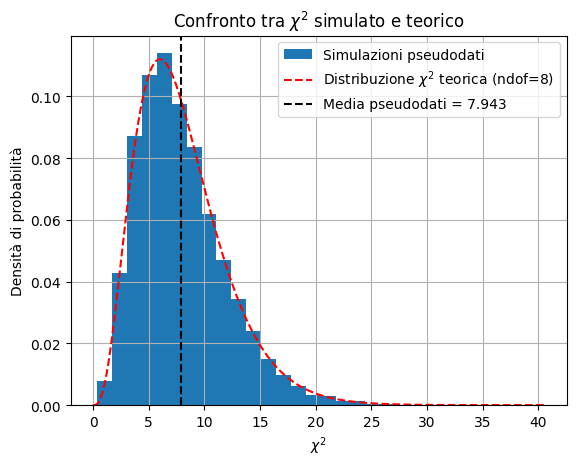

In [107]:
from scipy.stats import chi2
mean_C = np.mean(CHI2)

plt.hist(CHI2, bins=30, density=True, label="Simulazioni pseudodati")
ndof = npoints - 2
xplot = np.linspace(0, np.max(CHI2), nsim) 
chi2_pdf = chi2.pdf(xplot, ndof)

plt.plot(xplot, chi2_pdf, 'r--', label=f'Distribuzione $\\chi^2$ teorica (ndof={ndof})')
plt.axvline(mean_C, color='black', linestyle='--', label=f'Media pseudodati = {mean_C:.3f}')

# Etichette e legenda
plt.xlabel('$\chi^2$')
plt.ylabel('Densità di probabilità')
plt.title("Confronto tra $\chi^2$ simulato e teorico")
plt.legend()
plt.grid(True)
plt.show()


### Varianza

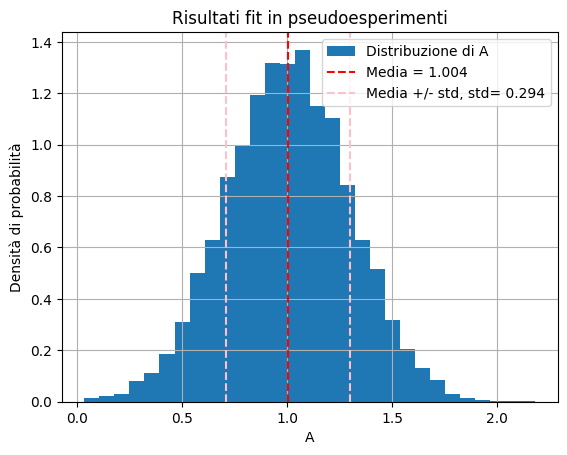

In [108]:
import numpy as np
import matplotlib.pyplot as plt

mean_A = np.mean(AF)
std_A = np.std(AF)
plt.hist(AF, bins=30, density=True, label="Distribuzione di A")

plt.axvline(mean_A, color='red', linestyle='--', label=f'Media = {mean_A:.3f}')
plt.axvline(mean_A + std_A, color='pink', linestyle='--', label=f'Media +/- std, std= {std_A:.3f}')
plt.axvline(mean_A - std_A, color='pink', linestyle='--', )

plt.xlabel('A')
plt.ylabel('Densità di probabilità')
plt.title("Risultati fit in pseudoesperimenti")
plt.legend()
plt.grid(True)
plt.show()


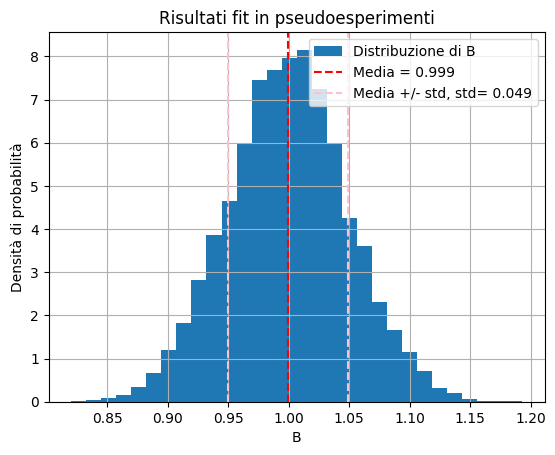

In [109]:
import numpy as np
import matplotlib.pyplot as plt

mean_B = np.mean(BF)
std_B = np.std(BF)
plt.hist(BF, bins=30, density=True, label="Distribuzione di B")

plt.axvline(mean_B, color='red', linestyle='--', label=f'Media = {mean_B:.3f}')
plt.axvline(mean_B + std_B, color='pink', linestyle='--', label=f'Media +/- std, std= {std_B:.3f}')
plt.axvline(mean_B - std_B, color='pink', linestyle='--', )

plt.xlabel('B')
plt.ylabel('Densità di probabilità')
plt.title("Risultati fit in pseudoesperimenti")
plt.legend()
plt.grid(True)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


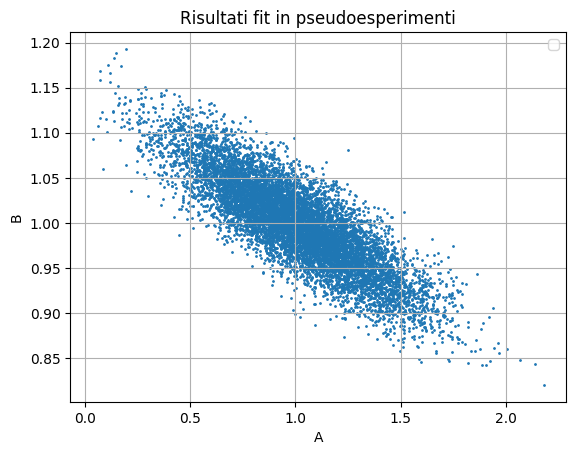

In [110]:
plt.scatter(AF, BF, s=1)
plt.xlabel('A')
plt.ylabel('B')
#plt.ylabel('Densità di probabilità')
plt.title("Risultati fit in pseudoesperimenti")
plt.legend()
plt.grid(True)
plt.show()

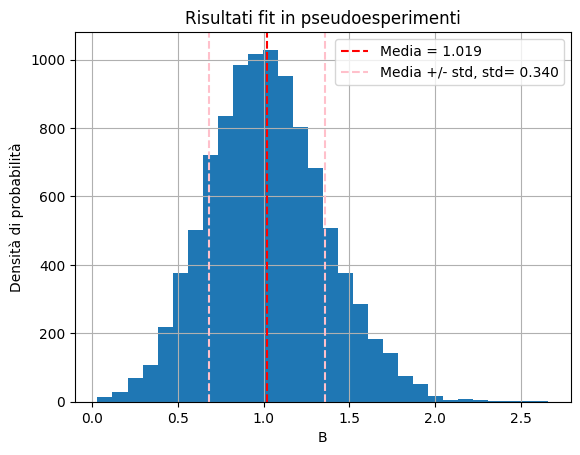

In [111]:
R = AF/BF
plt.hist(R, bins=30)

mean_R = np.mean(R)
std_R = np.std(R)
plt.axvline(mean_R, color='red', linestyle='--', label=f'Media = {mean_R:.3f}')
plt.axvline(mean_R + std_R, color='pink', linestyle='--', label=f'Media +/- std, std= {std_R:.3f}')
plt.axvline(mean_R - std_R, color='pink', linestyle='--', )

plt.xlabel('B')
plt.ylabel('Densità di probabilità')
plt.title("Risultati fit in pseudoesperimenti")
plt.legend()
plt.grid(True)
plt.show()

In [115]:
sigma_R = abs(R) * np.sqrt((SAF / AF)**2 + (SBF / BF)**2 - 2 * (COV / (AF * BF)))
sigma_R_sbagliato = abs(R) * np.sqrt((SAF / AF)**2 + (SBF / BF)**2 )

In [116]:
sigma_R.mean()

0.33931371460302095

In [117]:
sigma_R_sbagliato.mean()

0.299680707460096